In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, GRU
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv('../Data/Frozen_Dessert_Production.csv')

In [3]:
df.columns = ['DATE','total']

In [4]:
df=df.set_index('DATE')

<AxesSubplot:xlabel='DATE'>

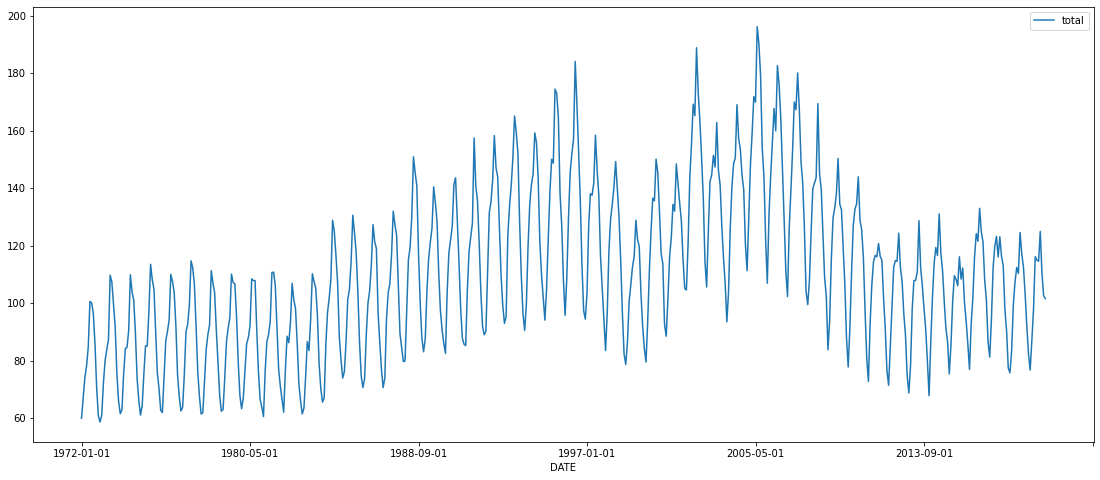

In [5]:
df.plot(figsize=(19,8))

In [6]:
n_features = 1
length= 12

# Test train split

In [7]:
df.shape

(573, 1)

In [8]:
573*.8

458.40000000000003

In [9]:
train = df.iloc[:468]
test = df.iloc[468:]

# scale the data

In [10]:
scale = MinMaxScaler()

In [11]:
train_=scale.fit_transform(train)
test_ = scale.transform(test)

In [12]:
train_.shape, test_.shape


((468, 1), (105, 1))

# TimeseriesGenerator

In [13]:
train_gen = TimeseriesGenerator(train_,train_,length=length,batch_size=1)
test_gen = TimeseriesGenerator(test_,test_,length=length,batch_size=1)

# Model Initialization


In [14]:
model = Sequential()
model.add(SimpleRNN(20,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(train_gen, validation_data=test_gen,epochs=10)

Epoch 1/10
456/456 [==============================] - 25s 47ms/step - loss: 0.0288 - val_loss: 0.0039
Epoch 2/10
456/456 [==============================] - 15s 33ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 3/10
456/456 [==============================] - 13s 29ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 4/10
456/456 [==============================] - 14s 32ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 5/10
456/456 [==============================] - 13s 28ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 6/10
456/456 [==============================] - 14s 30ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7/10
456/456 [==============================] - 16s 34ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 8/10
456/456 [==============================] - 13s 28ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 9/10
456/456 [==============================] - 11s 25ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 10/10
456/456 [==============================] - 12s 26ms/step - loss: 0.001

In [18]:
pred = model.predict(test_gen)
pred = scale.inverse_transform(pred)

In [39]:
pred.shape

(93, 1)

In [40]:
test.shape

(105, 2)

In [41]:
pad = np.zeros(length) * np.nan
pad

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [42]:
pred_pad = np.append(pad.reshape(-1,1),pred, axis=0)

In [43]:
test['SimpleRNN'] = pred_pad

<ipython-input-43-e155e1f7212e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = pred_pad


<AxesSubplot:xlabel='DATE'>

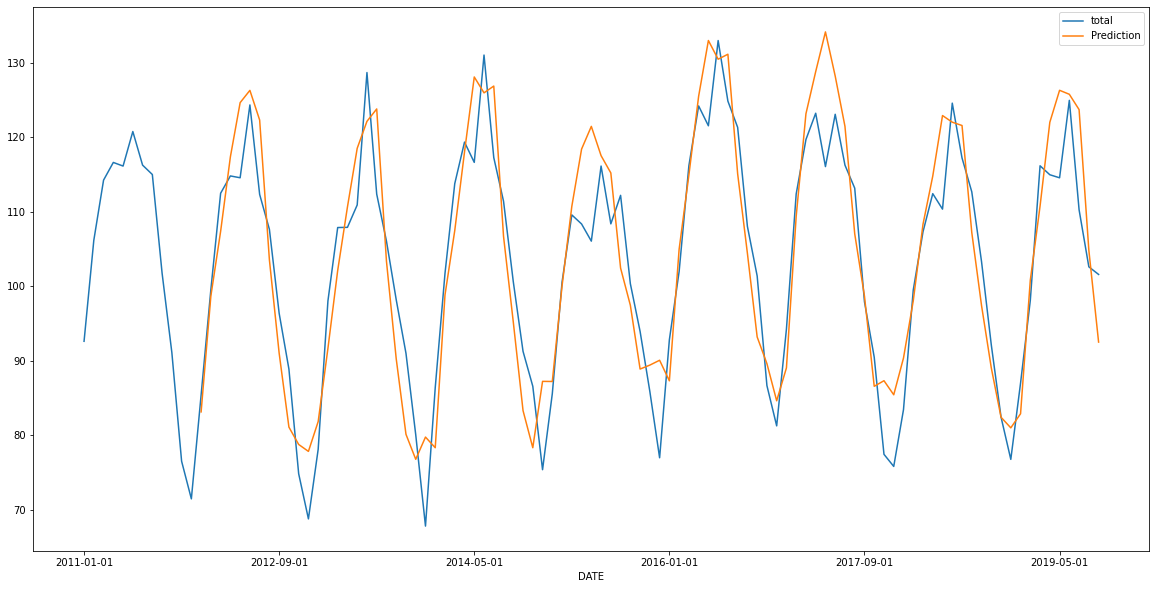

In [45]:
test.plot(figsize=(20,10))

# Repeat with LSTM

In [46]:
model = Sequential()
model.add(LSTM(20,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(train_gen, validation_data=test_gen,epochs=10)

Epoch 1/10
456/456 [==============================] - 27s 54ms/step - loss: 0.0433 - val_loss: 0.0115
Epoch 2/10
456/456 [==============================] - 24s 53ms/step - loss: 0.0200 - val_loss: 0.0066
Epoch 3/10
456/456 [==============================] - 25s 54ms/step - loss: 0.0111 - val_loss: 0.0038
Epoch 4/10
456/456 [==============================] - 25s 54ms/step - loss: 0.0074 - val_loss: 0.0028
Epoch 5/10
456/456 [==============================] - 20s 44ms/step - loss: 0.0057 - val_loss: 0.0028
Epoch 6/10
456/456 [==============================] - 21s 46ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 7/10
456/456 [==============================] - 21s 46ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 8/10
456/456 [==============================] - 21s 45ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 9/10
456/456 [==============================] - 21s 46ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 10/10
456/456 [==============================] - 20s 45ms/step - loss: 0.004

<ipython-input-49-bd5324c3aca6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM'] = pred_pad


<AxesSubplot:xlabel='DATE'>

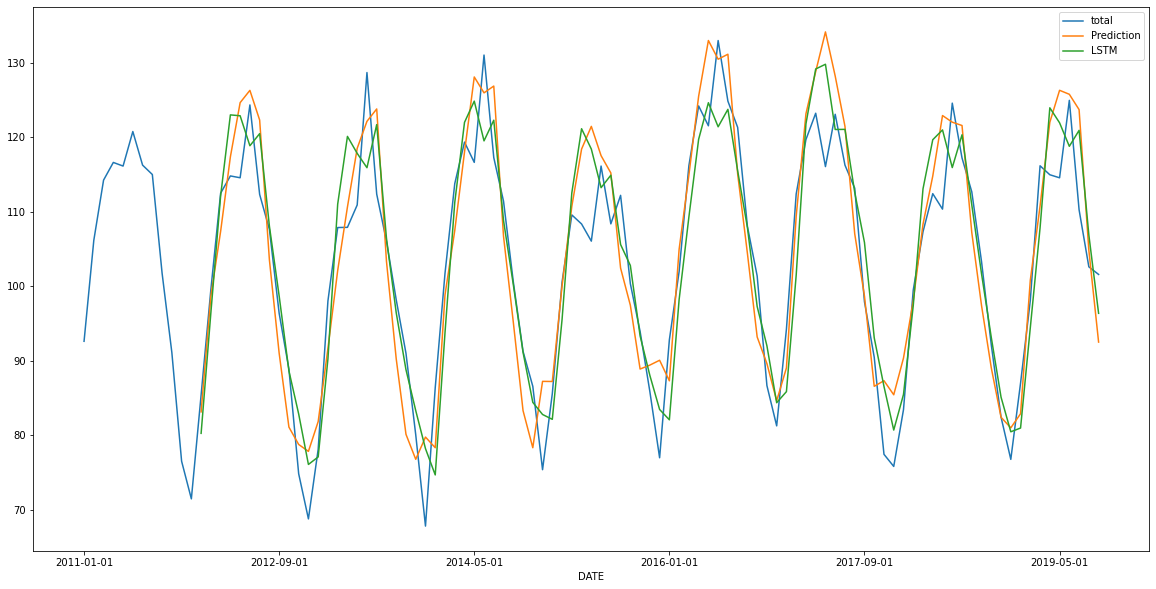

In [49]:
pred = model.predict(test_gen)
pred = scale.inverse_transform(pred)
pad = np.zeros(length) * np.nan
pred_pad = np.append(pad.reshape(-1,1),pred, axis=0)
test['LSTM'] = pred_pad
test.plot(figsize=(20,10))

# repeat with mode neurons 

In [50]:
model = Sequential()
model.add(LSTM(40,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

model.fit(train_gen, validation_data=test_gen,epochs=20)

Epoch 1/20
456/456 [==============================] - 27s 54ms/step - loss: 0.0553 - val_loss: 0.0063
Epoch 2/20
456/456 [==============================] - 20s 44ms/step - loss: 0.0122 - val_loss: 0.0081
Epoch 3/20
456/456 [==============================] - 28s 61ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 4/20
456/456 [==============================] - 30s 66ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 5/20
456/456 [==============================] - 24s 53ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 6/20
456/456 [==============================] - 25s 55ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 7/20
456/456 [==============================] - 21s 46ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 8/20
456/456 [==============================] - 27s 59ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 9/20
456/456 [==============================] - 23s 51ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 10/20
456/456 [==============================] - 20s 44ms/step - loss: 0.003

<ipython-input-51-b1e46ebefe52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM-2'] = pred_pad


<AxesSubplot:xlabel='DATE'>

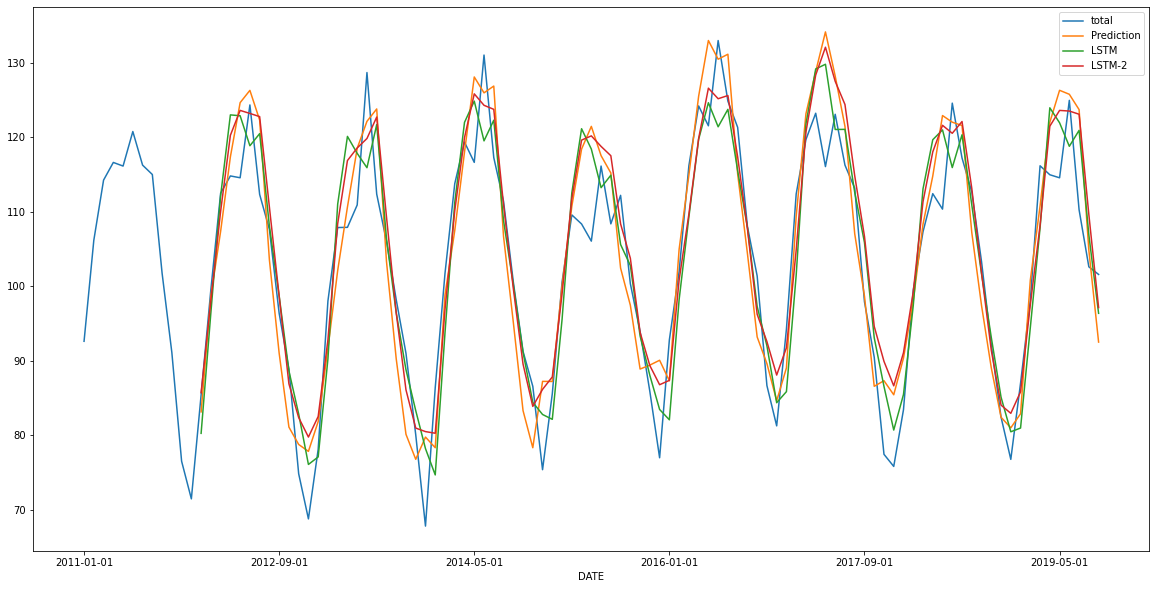

In [51]:
pred = model.predict(test_gen)
pred = scale.inverse_transform(pred)
pad = np.zeros(length) * np.nan
pred_pad = np.append(pad.reshape(-1,1),pred, axis=0)
test['LSTM-more neurons'] = pred_pad
test.plot(figsize=(20,10))

# with GRU


In [52]:
model = Sequential()
model.add(GRU(40,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

model.fit(train_gen, validation_data=test_gen,epochs=20)

Epoch 1/20
456/456 [==============================] - 42s 88ms/step - loss: 0.0680 - val_loss: 0.0081
Epoch 2/20
456/456 [==============================] - 31s 68ms/step - loss: 0.0138 - val_loss: 0.0053
Epoch 3/20
456/456 [==============================] - 28s 62ms/step - loss: 0.0083 - val_loss: 0.0044
Epoch 4/20
456/456 [==============================] - 27s 59ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 5/20
456/456 [==============================] - 27s 58ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 6/20
456/456 [==============================] - 29s 64ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 7/20
456/456 [==============================] - 27s 60ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 8/20
456/456 [==============================] - 28s 60ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 9/20
456/456 [==============================] - 26s 58ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 10/20
456/456 [==============================] - 27s 58ms/step - loss: 0.003

<AxesSubplot:xlabel='DATE'>

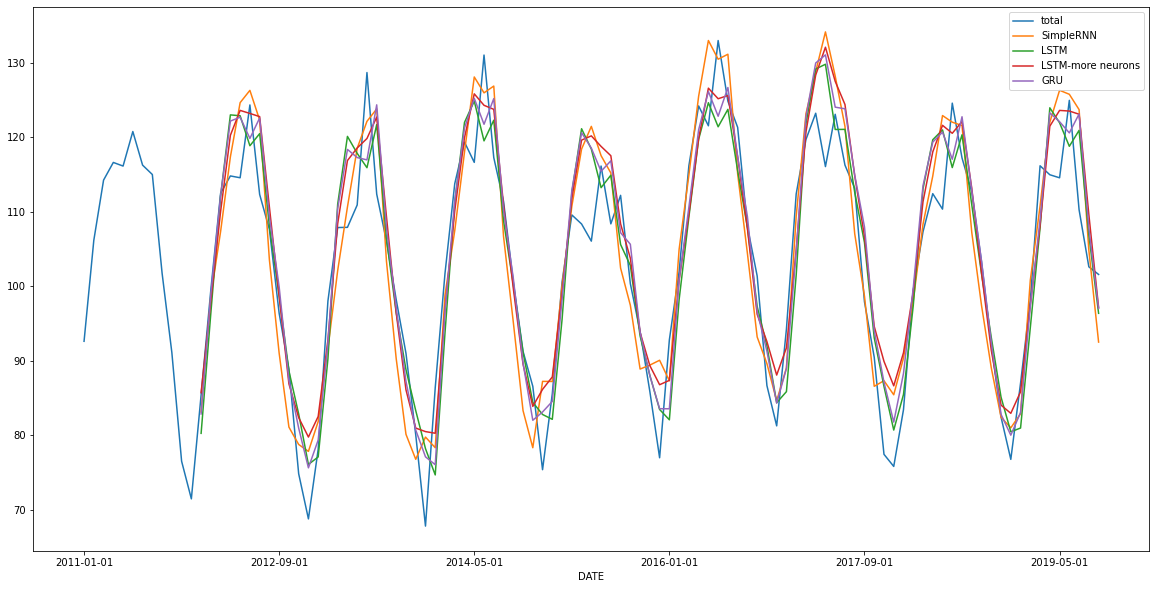

In [74]:
pred = model.predict(test_gen)
pred = scale.inverse_transform(pred)
pad = np.zeros(length) * np.nan
pred_pad = np.append(pad.reshape(-1,1),pred, axis=0)
test['GRU'] = pred_pad
test.plot(figsize=(20,10))

<AxesSubplot:xlabel='DATE'>

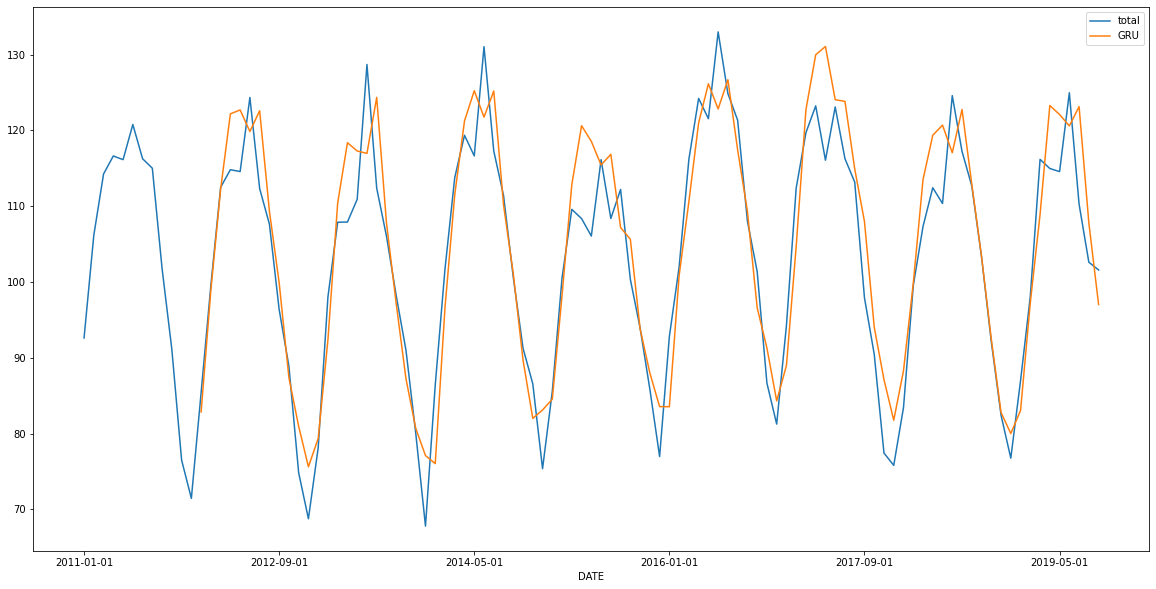

In [55]:
test[['total','GRU']].plot(figsize=(20,10))

# Above graphs compare the results from different models. 
# All the models are performing quite well. 
# However for small dataset, SimpleRNN turns out to be little better than others.